# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [65]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [66]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

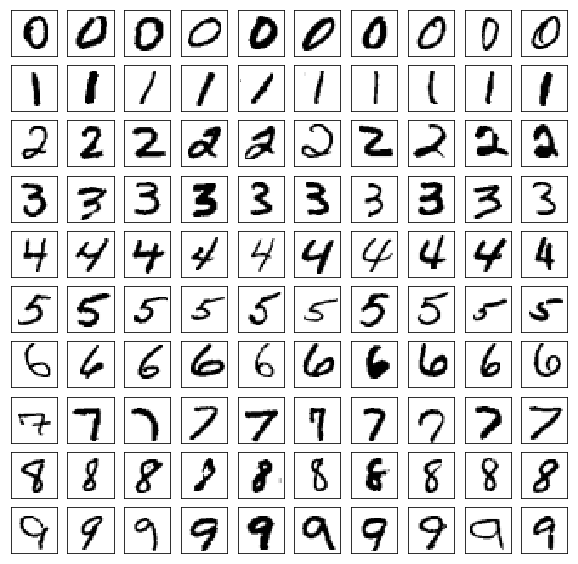

In [490]:
def P1(num_examples=10):
    """Function to plot examples of each digit from the data set
    
    PARAMETERS: 
    - num_examples - int, number of examples per digit to plot.
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###

    for i in range(10):
        for j in range (num_examples):
            
            # create a True Index for specific 'i' digit label/value
            data_id = mini_train_labels == str(i)
            
            # create a subset of training data that contains only specific digit 'i'
            oneD = mini_train_data[data_id]
            
            # reshaping a record in oneD from 1X784 array to a square 28X28 array
            Z = np.reshape(oneD[j,], (28,28))
            
            # plot images
            ax = plt.subplot(10,10,i*10+j+1)
            plt.setp(ax,xticks=(),yticks=())
            plt.imshow(Z,cmap="gray_r")           
    return;

### STUDENT END ###

P1(10)


### Part 2:

Produce k-Nearest Neighbors models with k = [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [491]:
def P2(k_values):
    """Function to create and evaluate a kNN model
    
    PARAMETERS: 
    - k_values - list, number of nearest neighbours
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###

    for i in range(len(k_values)):
        
        # produce k-Nearest Neighbors model for value in 'k_values'
        knn_classification_model = KNeighborsClassifier(n_neighbors=k_values[i])
        
        # train on mini_train_data
        knn_classification_model.fit(mini_train_data, mini_train_labels)
        
        # Evaluate performance on the dev data
        accuracy = knn_classification_model.score(dev_data, dev_labels)
        
        # Report accuracy of model
        print ("Accuracy for KNN-",k_values[i],"is: ", accuracy)
        
        if k_values[i] == 1:
            print('\n')
            print('Classification report for kNN-1:')
            predictions = knn_classification_model.predict(dev_data)
            print(classification_report(dev_labels, predictions))
    return;
     
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy for KNN- 1 is:  0.884


Classification report for kNN-1:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy for KNN- 3 is:  0.876
Accuracy for KNN- 5 is:  0.882
Accuracy for KNN- 7 is:  0.877
Accuracy for KNN- 9 is:  0.875


QUESTION:
Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

ANSWER:
The most difficult digit to classify is the number 8, which has the lowest f1-score: 0.8.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [492]:
def P3(train_sizes, accuracies):
    """Function to create, evaluate and time a kNN model for different data set sizes
    
    PARAMETERS: 
    - train_sizes - list, size of data set
    - accuracies - list, empty list
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###
    
    # Set k value
    k_value = 1
    
    for i in range(len(train_sizes)):
        
        # Create training data set of a specific size
        training_data = train_data[:train_sizes[i]]
        training_labels = train_labels[:train_sizes[i]]

        # MODEL: k-Nearest Neighbors model for value in 'k_value'
        knn_classification_model = KNeighborsClassifier(n_neighbors = k_value)
        
        # TRAIN
        knn_classification_model.fit(training_data, training_labels)
        
        # Capture start time
        start_time = time.time()
        
        # EVALUATE performance on the dev data
        predictions = knn_classification_model.predict(dev_data)       
        
        # Capture end time
        end_time = time.time()
        
        # Calculate elapsed time
        elapsed_time = end_time - start_time
        
        # Store accuracy of KNN model
        accuracy = knn_classification_model.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        
        # printing report
        print("For a data set size: {} the model performance / accuracy is: {:.3}, and the prediction time is: {:.3} seconds".format(train_sizes[i], accuracies[i], elapsed_time))
       
    return;

print('Measurement of performance of 1-Nearest Neighbor model for different training data sizes:')
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Measurement of performance of 1-Nearest Neighbor model for different training data sizes:
For a data set size: 100 the model performance / accuracy is: 0.702, and the prediction time is: 0.104 seconds
For a data set size: 200 the model performance / accuracy is: 0.791, and the prediction time is: 0.204 seconds
For a data set size: 400 the model performance / accuracy is: 0.811, and the prediction time is: 0.421 seconds
For a data set size: 800 the model performance / accuracy is: 0.866, and the prediction time is: 0.831 seconds
For a data set size: 1600 the model performance / accuracy is: 0.905, and the prediction time is: 1.69 seconds
For a data set size: 3200 the model performance / accuracy is: 0.927, and the prediction time is: 3.4 seconds
For a data set size: 6400 the model performance / accuracy is: 0.939, and the prediction time is: 6.83 seconds
For a data set size: 12800 the model performance / accuracy is: 0.952, and the prediction time is: 14.0 seconds
For a data set size: 2

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint: y is a number in range 0 to 1.  odds(y)=y/(1-y) is a number in range 0 to infinity.

R^2 for the normal model is:0.418 and for the log model is:0.907
Accuracy for k = 60000 for normal model was 1.236
Accuracy for k = 60000 for log model was 1.034
Accuracy for k = 120000 for normal model was 1.637
Accuracy for k = 120000 for log model was 1.064
Accuracy for k = 1000000 for normal model was 7.522
Accuracy for k = 1000000 for log model was 1.158


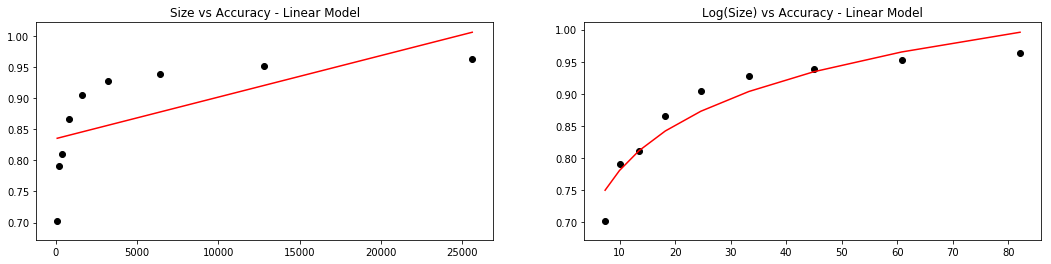

In [493]:
def P4():
    """Function to create linear and log regression models based on data set from Problem 3
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###

    ## FIT MODELS
    trn_size = np.asarray(train_sizes).reshape(-1,1)
    accuracy = np.asarray(accuracies).reshape(-1,1)  
    
    # Fit a linear regression model
    ln_regression = LinearRegression()
    ln_regression.fit(trn_size, accuracy)
    
    predicted_accuracy_normal = ln_regression.predict(trn_size)
    
    # R2 score - normal
    ssr_normal = np.sum((predicted_accuracy_normal - accuracy)**2)
    sst_normal = np.sum((accuracy - np.mean(accuracy))**2)
    r2_score_normal = 1 - (ssr_normal/sst_normal)
    
    # Fit a log-linear regression model
    trn_log = np.log10(trn_size)
    
    ln_regression2 = LinearRegression()
    ln_regression2.fit(trn_log, accuracy)   

    predicted_accuracy_log = ln_regression2.predict(trn_log)

    # R2 score - normal
    ssr_log = np.sum((predicted_accuracy_log - accuracy)**2)
    sst_log = np.sum((accuracy - np.mean(accuracy))**2)
    r2_score_log = 1 - (ssr_log/sst_log)
    
    print('R^2 for the normal model is:' + str(round(r2_score_normal,3)) + ' and for the log model is:' + str(round(r2_score_log,3)))
    
    ## PLOT MODELS
    f = plt.figure(figsize=(18,4))
        
    # plot regular
    ax = f.add_subplot(121)
        
    #scatter plot of accuracies vs train sizes
    ax.scatter(train_sizes,accuracy, color='black')
        
    # Show samples from the fitted function.
    ax.plot(trn_size, ln_regression.predict(trn_size), color='red')
    ax.set_title("Size vs Accuracy - Linear Model")
        
    # plot log model
    ax2 = f.add_subplot(122)
        
    #scatter plot of accuracies vs train sizes
    ax2.scatter(np.exp(trn_log), accuracy, color='black')
        
    # Show samples from the fitted function.    
    ax2.plot(np.exp(trn_log), ln_regression2.predict(trn_log), color='red')
    ax2.set_title("Log(Size) vs Accuracy - Linear Model")
        
      
    ## EVALUATE ACCURACY FOR SET SIZE: 60000, 120000, and 1000000
    test = [60000, 120000, 1000000]
    for item in test:
        # Predict for 60000 for training size
        prediction_normal = ln_regression.predict(np.array([item]).reshape(-1,1))
        prediction_log = ln_regression2.predict(np.log10(np.array([item]).reshape(-1,1)))
        
        print("Accuracy for k = " + str(item) + " for normal model was " + str(round(float(prediction_normal[0][0]),3)))
        print("Accuracy for k = " + str(item) + " for log model was " + str(round(float(prediction_log[0][0]),3)))

        
### STUDENT END ###

P4()

QUESTION: What's wrong with using regression in the simple model without the transformation?

ANSWER: the simple linear regression does not fit the data.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Confusion matrix:
 [[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]
Normalized confusion matrix:
 [[95.  0.  1.  0.  0.  0.  1.  1.  2.  0.]
 [ 0. 98.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  4. 79.  2.  2.  0.  2.  4.  6.  1.]
 [ 0.  2.  0. 87.  0.  6.  0.  2.  3.  0.]
 [ 0.  0.  1.  0. 85.  0.  0.  2.  0. 12.]
 [ 2.  0.  0.  1.  1. 88.  6.  0.  2.  0.]
 [ 1.  2.  1.  0.  1.  2. 92.  0.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0. 94.  0.  4.]
 [ 1.  5.  4.  3.  1.  3.  0.  1. 77.  4.]
 [ 0.  1.  0.  0.  3.  2.  0.  7.  0. 86.]]


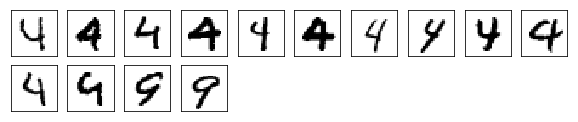

In [231]:
def P5():
    """Function to create confusion matrix to identify most confused digits
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###

    # Create Model
    knn_model = KNeighborsClassifier(1)
    knn_model.fit(mini_train_data, mini_train_labels)
    
    # Evaluate performance
    predictions = knn_model.predict(dev_data)
    
    # Create Confusion Matrix
    conf_matrix = confusion_matrix(dev_labels, predictions, labels=np.unique(dev_labels))
    print("Confusion matrix:\n", conf_matrix)
      
    # normalized confusion matrix
    conf_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]*100
    print("Normalized confusion matrix:\n",conf_normalized.round(0))    
    
    confused_index = np.intersect1d(np.where(dev_labels== '4') ,  np.where(predictions == '9'))
    
    # create a subset of training data that contains only specific digit 'i'
    confused_data = dev_data[confused_index]
    
    i=1
    
    for confusion in confused_data:
        Z = np.reshape(confusion, (28,28))
        
        # plot images
        ax = plt.subplot(10,10,i)
        plt.setp(ax,xticks=(),yticks=())
        plt.imshow(Z,cmap="gray_r") 
        i = i + 1
    
    confused_index = np.intersect1d(np.where(dev_labels== '9') ,  np.where(predictions == '4'))
    
    # create a subset of training data that contains only specific digit 'i'
    confused_data = dev_data[confused_index]
    
    for confusion in confused_data:
        Z = np.reshape(confusion, (28,28))
        
        # plot images
        ax = plt.subplot(10,10,i)
        plt.setp(ax,xticks=(),yticks=())
        plt.imshow(Z,cmap="gray_r") 
        i = i + 1
        
### STUDENT END ###

P5()

QUESTION: Which pair of digits does the model confuse most often? 

ANSWER: There are 11 - fours classified as nine, however only three nines classified and fours. (Confusions are displayed above)

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Produce four 1-Nearest Neighbor models by applying your blur filter in four ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [495]:
### STUDENT START ###
        
def blur_data(data_to_blur):
    """Function to blur pixels for each digit by weighting with surrounding pixels
    
    PARAMETERS: 
    - data_to_blur - array, data set to blur
    
    RETURNS: 
    - blurred_data - array, blurred data set
    """    
    # create new data array
    blurred_data = data_to_blur.copy()
    
    # blur images
    for img in range(data_to_blur.shape[0]):
    
        # reshape image into a matrix 28x28
        digit = np.reshape(data_to_blur[img,],(28,28))
        # create a zero/ placeholder matrix for blurred image
        digit_blurred = np.zeros((28,28))
        
        ## Apply blur
        for i in range (1,27):
            for j in range (1,27):
                # applying blur for a pixels. sum all surrounding pixels and divide by 9
                # *** Assumption *** pixels on the edge of the picture are white therefore no need to complicate the weighting
                digit_blurred[i,j] = sum(sum(digit[i-1:i+2,j-1:j+2]))/9
      
        # reshape image into a row 1x784
        blurred_data[img,] = np.reshape(digit_blurred,(1,784))
    
    return  blurred_data
    
def P6():
    """Function to run kNN model with different data sources (blurred/ not blurred)
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
    k_value = 1
    
    mini_train_data_blurred = blur_data(mini_train_data)
    dev_data_blurred = blur_data(dev_data)
    
    # Model - No Blur Filter on Training Data of Dev Data
    model_NoFilter = KNeighborsClassifier(k_value)
    model_NoFilter.fit(mini_train_data, mini_train_labels)
    print("Model - no blur filter accuracy is {}.".format(model_NoFilter.score(dev_data, dev_labels)))
    
    # Model - with Training data blur filter only
    model_TrainFilter = KNeighborsClassifier(k_value)
    model_TrainFilter.fit(mini_train_data_blurred, mini_train_labels)
    print("Model - with Training data blur filter only accuracy is {}.".format(model_TrainFilter.score(dev_data, dev_labels)))
    
    # Model - with Dev Data blur filter only
    model_DevFilter = KNeighborsClassifier(k_value)
    model_DevFilter.fit(mini_train_data, mini_train_labels)
    print("Model - with Dev Data blur filter only accuracy is {}.".format(model_DevFilter.score(dev_data_blurred, dev_labels)))
    
    # Model - Blur filter on Training Data and Dev Data
    model_BothFilter = KNeighborsClassifier(k_value)
    model_BothFilter.fit(mini_train_data_blurred, mini_train_labels)
    print("Model - with blur filter accuracy is {}.".format(model_BothFilter.score(dev_data_blurred, dev_labels)))

### STUDENT END ###

P6()

Model - no blur filter accuracy is 0.884.
Model - with Training data blur filter only accuracy is 0.907.
Model - with Dev Data blur filter only accuracy is 0.868.
Model - with blur filter accuracy is 0.905.


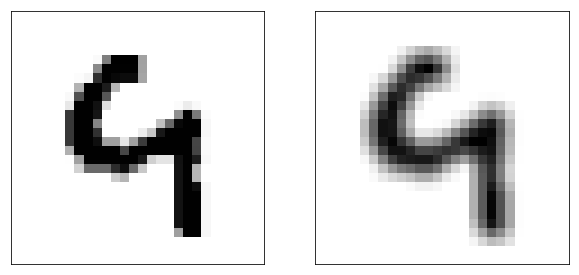

In [247]:
dev_data_blurred = blur_data(dev_data)

# Digit without blur
digit = np.reshape(dev_data[1,],(28,28))
ax = plt.subplot(1,2,1)
plt.setp(ax,xticks = (),yticks = ())
plt.imshow(digit,cmap = 'gray_r')

# Digit with blur
digit_blurred = np.reshape(dev_data_blurred[1,],(28,28))
ax=plt.subplot(1,2,2)
plt.setp(ax,xticks = (),yticks = ())
plt.imshow(digit_blurred,cmap = 'gray_r')

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [287]:
def P7():
    """Function to create and compare results of Binary and Multinomial Naive Bayes models
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###

    ## BernoulliNB
    model_Bernoulli = BernoulliNB(alpha = 1, binarize = 0.3)
    model_Bernoulli.fit(mini_train_data, mini_train_labels)
    print("Bernoulli Model accuracy is: " + str(model_Bernoulli.score(dev_data, dev_labels)))
    
    ## MultinomialNB
    thresholds = [0.2, 0.95]
    
    # Create new data of all zeroes
    mini_train_data_grey = np.zeros(mini_train_data.shape)
    
    # iterate through thresholds
    for i, threshold in enumerate(thresholds):
        mini_train_data_grey[mini_train_data > threshold] = i + 1    

    # Create new data of all zeroes
    dev_data_grey = np.zeros(dev_data.shape)    
 
    # iterate through thresholds
    for i, threshold in enumerate(thresholds):
        dev_data_grey[dev_data > threshold] = i + 1  
    
    # Fit model
    model_multinomial = MultinomialNB(alpha=1)
    model_multinomial.fit(mini_train_data_grey, mini_train_labels)    
    print("Multinomial Model accuracy is: " + str(model_multinomial.score(dev_data_grey, dev_labels)))
    
### STUDENT END ###

P7()

Bernoulli Model accuracy is: 0.827
Multinomial Model accuracy is: 0.821


QUESTION: Does the multinomial version improve the results? Why or why not?

ANSWER: Mutlinomial model has performed worse than Bernoulli model. This is likely because the grey category is dependent on the 'black' category. Even in the Bernoulli version the preformance is best if the threshold is set to 0.9 or above. This would suggest that the black category has the highest contribution to accuracy of the model. 

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [298]:
def P8(alphas):
    """Function to search for the best LaPlace smoothing parameter
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###

    # GridSearchCV with BernoulliNB, alphas, with my best binarization from section 7
    model_Bernoulli = GridSearchCV(BernoulliNB(binarize = 0.3), alphas)
    
    ## BernoulliNB fit
    model_Bernoulli.fit(mini_train_data, mini_train_labels)
    
    return model_Bernoulli

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)
print("Best score = ", nb.best_score_)


C:\Users\walek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



Best alpha =  {'alpha': 0.001}
Best score =  0.826


C:\Users\walek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


QUESTION: What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

ANSWER: Best value for alpha is 0.001. The best score is 0.826 which is lower than what I have achieved in exercise 7 for alpha = 1. I would have expected an improvement, however I assume that there was no improvement because one data set has been used for both training and testing.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [358]:
def P9():
    """Function to create Gaussian naive Bayes model and update its sigma and theta parameters to improve performance
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
### STUDENT END ###
    
    # GaussianNB model - simple
    model_GaussiaNB = GaussianNB()
    model_GaussiaNB.fit(mini_train_data, mini_train_labels)
    print ('GaussianNB model accuracy is: ' + str(model_GaussiaNB.score(dev_data, dev_labels)))
    print(model_GaussiaNB.sigma_)
    
    # Playing with sigma
    model_GaussiaNB.sigma_ = model_GaussiaNB.sigma_ + .02
    print ('GaussianNB model with adjusted sigma value accuracy is ' + str(model_GaussiaNB.score(dev_data, dev_labels)))
    print(model_GaussiaNB.sigma_)
    
    # Playing with theta
    model_GaussiaNB.theta_ = model_GaussiaNB.theta_ + .0001
    print ('GaussianNB model with adjusted sigma and theta value accuracy is ' + str(model_GaussiaNB.score(dev_data, dev_labels)))
    
    ### STUDENT END ###

P9()

GaussianNB model accuracy is: 0.593
[[2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 ...
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]]
GaussianNB model with adjusted sigma value accuracy is 0.818
[[0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]]
GaussianNB model with adjusted sigma and theta value accuracy is 0.818


PROBLEM: Show the model accuracy before your fix and the model accuracy after your fix. Explain your solution.

ANSWER: **Sigma** - *variance of each feature per class*; The variance seems to be relatively low. An adjustment of 0.02 helps achieve results similar to the BernoulliNB model. Any adjustments of **theta** - *mean of each feature per class* seem to be either adverse or neutral.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

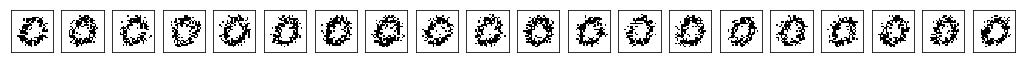

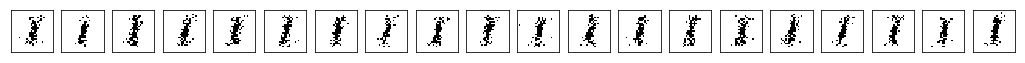

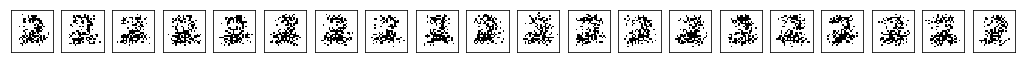

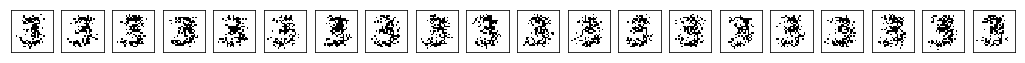

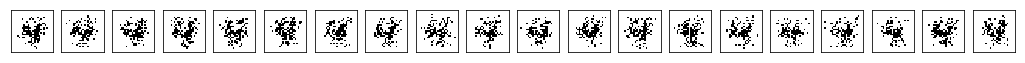

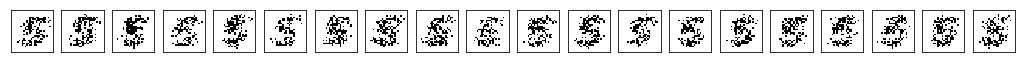

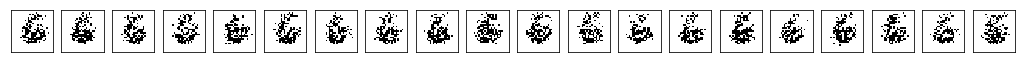

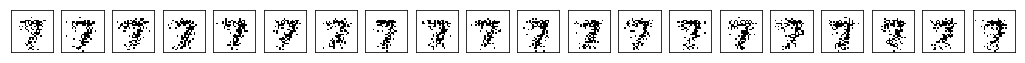

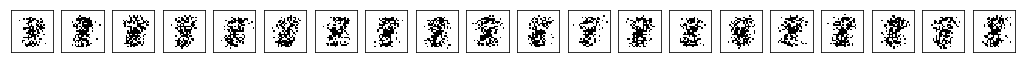

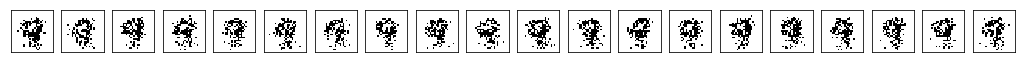

In [376]:
def P10(num_examples):
    """Function to generate digit pixels based on Bernoulli Naive Bayes model
    
    PARAMETERS: 
    - num_examples - int, number of examples per digit to plot.
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###
    
    # Training a BernoulliNB model
    model_Bernoulli = BernoulliNB(alpha=0.001, binarize=0.3)
    model_Bernoulli.fit(mini_train_data, mini_train_labels)
    
    probability = np.exp(model_Bernoulli.feature_log_prob_)

    # running for loop for all digits
    for number in range(10):
              
        f = plt.figure(figsize=(18,10))
        
        # generate digit and plot
        for example in range(num_examples):
            
            # generate digit pixels based on random probability
            digit = probability[number] > np.random.rand(784)
            
            # plot digits
            ax = plt.subplot(10, num_examples, num_examples * number + example + 1)
            plt.setp( ax, xticks = (),yticks = ())
            plt.imshow(digit.reshape(28,28) , cmap='gray_r') 

### STUDENT END ###

P10(20)

QUESTION: How do the generated digit images compare to the training digit images?

ANSWER: the generated digits seem to have lost the continuity that is apparent in the original. A Bernoulli model can only have 0 and 1 values, it is therefore the continuity is lost.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [488]:
def P11(buckets, correct, total):
    """Function to calculate posterior probability and accuracy to enable evaluation of calibration of the NB model 
    
    PARAMETERS: 
    - buckets - list, list of posterior probability thresholds.
    - correct - list, to store number of correct classifications per bucket
    - total - list, to store number of posterior probabilities within the bucket range
    
    RETURNS: 
    - Not applicable
    """    
### STUDENT START ###

    # Training a BernoulliNB model
    model_Bernoulli = BernoulliNB(alpha=0.001, binarize=0.3)
    model_Bernoulli.fit(mini_train_data, mini_train_labels)
    
    # Calculating prediction probability
    predictions = model_Bernoulli.predict(dev_data)
    prediction_probability = model_Bernoulli.predict_proba(dev_data)
    
    # Get maximum probability
    max_prediction_probability = np.amax(prediction_probability, axis=1)
     
    # for each bucket
    for i, bucket in enumerate(buckets):
        
        # maximum probability within bucket
        bucket_index = (max_prediction_probability <= buckets[i]) & (max_prediction_probability >= (0 if i==0 else buckets[i-1]))
            
        # counting total and correct for the bucket
        correct_count = np.count_nonzero(predictions[bucket_index] == dev_labels[bucket_index])    
        total_count = np.count_nonzero(bucket_index)
            
        # updating total and correct list           
        correct[i] = correct_count
        total[i] = total_count
    
    return;

### STUDENT END ###

buckets = [ 0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
     accuracy = 0.0
     if (total[i] > 0): accuracy = correct[i] / total[i]
     print('p(pred) is %.13f to %.13f    correct = %3d    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], correct[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    correct =   0    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    correct =  10    total =  25    accuracy = 0.400
p(pred) is 0.9000000000000 to 0.9990000000000    correct =  38    total =  78    accuracy = 0.487
p(pred) is 0.9990000000000 to 0.9999900000000    correct =  43    total =  68    accuracy = 0.632
p(pred) is 0.9999900000000 to 0.9999999000000    correct =  39    total =  65    accuracy = 0.600
p(pred) is 0.9999999000000 to 0.9999999990000    correct =  39    total =  50    accuracy = 0.780
p(pred) is 0.9999999990000 to 0.9999999999900    correct =  48    total =  56    accuracy = 0.857
p(pred) is 0.9999999999900 to 0.9999999999999    correct =  50    total =  61    accuracy = 0.820
p(pred) is 0.9999999999999 to 1.0000000000000    correct = 569    total = 597    accuracy = 0.953


QUESTION: How would you characterize the calibration for this Bernoulli Naive Bayes model?

ANSWER: Per https://scikit-learn.org a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class.

Per instructions, a strongly calibrated model would be one where accuracy for buckets 0.9 to 1 would be 'roughly' 90%. This is clearly not the case, therefore this model is not calibrated well despite the fact that the accuracy improves with the higher posterior probability aka bucket.


### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [487]:
def row_sum(data):
    """Function to tranform data by row sum
    
    PARAMETERS: 
    - data - array, data to transform
    
    RETURNS: 
    - transformed_data - array, tranformed data
    """  
    # create new data array
    transformed_data = data.copy()
    
    # blur images
    for img in range(data.shape[0]):
    
        # reshape image into a matrix 28x28
        digit = np.reshape(data[img,],(28,28))
        # create a zero/ placeholder matrix for blurred image
        digit_blurred = np.zeros((28,28))
        
        ## Apply blur
        for i in range (1,27):
            for j in range (1,27):
                # sum 5 pixels in row
                block_sum = sum(sum(digit[i-1:i+2,j:j+1]))
                digit_blurred[i,j] = block_sum if block_sum <=1 else 1
      
        # reshape image into a row 1x784
        transformed_data[img,] = np.reshape(digit_blurred,(1,784))
        
    return transformed_data

def row_avg(data):
    """Function to tranform data by row_avg
    
    PARAMETERS: 
    - data - array, data to transform
    
    RETURNS: 
    - transformed_data - array, tranformed data
    """ 
    # create new data array
    transformed_data = data.copy()
    
    # blur images
    for img in range(data.shape[0]):
    
        # reshape image into a matrix 28x28
        digit = np.reshape(data[img,],(28,28))
        # create a zero/ placeholder matrix for blurred image
        digit_blurred = np.zeros((28,28))
        
        ## Apply blur
        for i in range (1,27):
            for j in range (1,27):
                # weigh 5 pixels in a row
                digit_blurred[i,j] = sum(sum(digit[i-1:i+2,j:j+1]))/3
      
        # reshape image into a row 1x784
        transformed_data[img,] = np.reshape(digit_blurred,(1,784))
        
    return transformed_data

def column_sum(data):
    """Function to tranform data by column_sum
    
    PARAMETERS: 
    - data - array, data to transform
    
    RETURNS: 
    - transformed_data - array, tranformed data
    """ 
    # create new data array
    transformed_data = data.copy()
    
    # blur images
    for img in range(data.shape[0]):
    
        # reshape image into a matrix 28x28
        digit = np.reshape(data[img,],(28,28))
        # create a zero/ placeholder matrix for blurred image
        digit_blurred = np.zeros((28,28))
        
        ## Apply blur
        for i in range (1,27):
            for j in range (1,27):
                # sum 5 pixels in row
                block_sum = sum(sum(digit[i:i+1,j-2:j+3]))
                digit_blurred[i,j] = block_sum if block_sum <=1 else 1
      
        # reshape image into a row 1x784
        transformed_data[img,] = np.reshape(digit_blurred,(1,784))
        
    return transformed_data

def column_avg(data):
    """Function to tranform data by column_avg
    
    PARAMETERS: 
    - data - array, data to transform
    
    RETURNS: 
    - transformed_data - array, tranformed data
    """ 
    # create new data array
    transformed_data = data.copy()
    
    # blur images
    for img in range(data.shape[0]):
    
        # reshape image into a matrix 28x28
        digit = np.reshape(data[img,],(28,28))
        # create a zero/ placeholder matrix for blurred image
        digit_blurred = np.zeros((28,28))
        
        ## Apply blur
        for i in range (1,27):
            for j in range (1,27):
                # weigh 5 pixels in a row
                digit_blurred[i,j] = sum(sum(digit[i:i+1,j-2:j+3]))/5
      
        # reshape image into a row 1x784
        transformed_data[img,] = np.reshape(digit_blurred,(1,784))
        
    return transformed_data

def block_sum(data):
    """Function to tranform data by block_sum
    
    PARAMETERS: 
    - data - array, data to transform
    
    RETURNS: 
    - transformed_data - array, tranformed data
    """ 
    # create new data array
    transformed_data = data.copy()
    
    # blur images
    for img in range(data.shape[0]):
    
        # reshape image into a matrix 28x28
        digit = np.reshape(data[img,],(28,28))
        # create a zero/ placeholder matrix for blurred image
        digit_blurred = np.zeros((28,28))
        
        ## Apply blur
        for i in range (1,27):
            for j in range (1,27):
                # applying blur for a pixels. sum all surrounding pixels and divide by 9
                block_sum = sum(sum(digit[i-1:i+2,j-1:j+2]))
                digit_blurred[i,j] = block_sum if block_sum <=0.99 else 0.99
      
        # reshape image into a row 1x784
        transformed_data[img,] = np.reshape(digit_blurred,(1,784))
        
    return transformed_data

def block_avg(data):
    """Function to tranform data by block_avg
    
    PARAMETERS: 
    - data - array, data to transform
    
    RETURNS: 
    - transformed_data - array, tranformed data
    """     
    # create new data array
    transformed_data = data.copy()
    
    # blur images
    for img in range(data.shape[0]):
    
        # reshape image into a matrix 28x28
        digit = np.reshape(data[img,],(28,28))
        # create a zero/ placeholder matrix for blurred image
        digit_blurred = np.zeros((28,28))
        
        ## Apply blur
        for i in range (1,27):
            for j in range (1,27):
                # applying blur for a pixels. sum all surrounding pixels and divide by 9
                digit_blurred[i,j] = sum(sum(digit[i-1:i+2,j-1:j+2]))/9
      
        # reshape image into a row 1x784
        transformed_data[img,] = np.reshape(digit_blurred,(1,784))
        
    return transformed_data

def train_model(data,labels,score_data,score_labels,model_type):
    """Function to train Bernoulli NB model
    
    PARAMETERS: 
    - data - array, training data for the model
    - labels - array, training labels for the model
    - score_data - array, dev data for the model
    - score_labels - array, dev lables for the model
    - model_type - string, that describes the type of data transformation applied to training and dev data
    
    RETURNS: 
    - Not applicable
    """     
    # Training a BernoulliNB model
    model_Bernoulli = BernoulliNB(alpha=0.001, binarize=0.3)
    model_Bernoulli.fit(mini_train_data, mini_train_labels)
    print('Bernoulli %s model accuracy is %.3f' % (model_type, model_Bernoulli.score(score_data,score_labels)))

def P12():
    """Function to apply different transformations on data and train a Bernoulli model
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """   
### STUDENT START ###
    
    # Base model
    train_model(mini_train_data, mini_train_labels,dev_data, dev_labels,'base')
    
    # Row Sum model    
    train_model(row_sum(mini_train_data), mini_train_labels,row_sum(dev_data), dev_labels,'row sum')

    # Row Average model    
    train_model(row_avg(mini_train_data), mini_train_labels,row_avg(dev_data), dev_labels,'row average')
    
    # Column Sum model    
    train_model(column_sum(mini_train_data), mini_train_labels,column_sum(dev_data), dev_labels,'column sum')
    
    # Column Average model    
    train_model(column_avg(mini_train_data), mini_train_labels,column_avg(dev_data), dev_labels,'column average')
    
    # Block Sum model    
    train_model(block_sum(mini_train_data), mini_train_labels,block_sum(dev_data), dev_labels,'block sum')
    
    # Block Average model    
    train_model(block_avg(mini_train_data), mini_train_labels,block_avg(dev_data), dev_labels,'block average')

### STUDENT END ###

P12()

Bernoulli base model accuracy is 0.836
Bernoulli row sum model accuracy is 0.786
Bernoulli row average model accuracy is 0.818
Bernoulli column sum model accuracy is 0.678
Bernoulli column average model accuracy is 0.811
Bernoulli block sum model accuracy is 0.700
Bernoulli block average model accuracy is 0.816
